In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#checking the Meta data information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
#checking for any null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Observation:no null value is found

# Exploratory Data Analysis (EDA)

## Univariate Analysis

we will be looking at the following features:

• Revenue column 

• Visitor type

• Traffic type

• Region 

• Weekend-wise distribution

• Browser and operating system

• Administrative page

• Information page

• Special day 

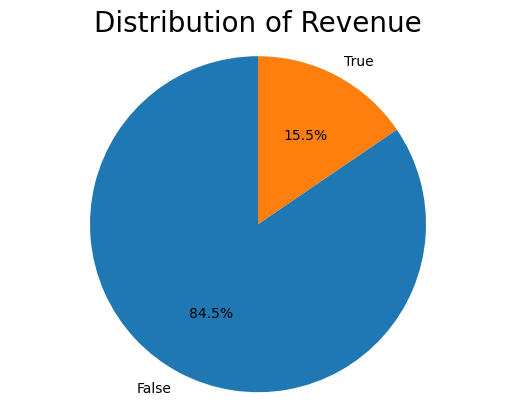

In [5]:
revenue_counts = df['Revenue'].value_counts()

# Create a pie chart
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Revenue', fontsize=20)
plt.show()

Observation: the false has a higher number count than true

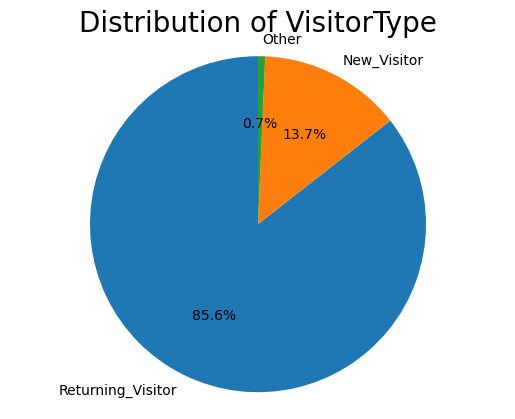

In [6]:
VisitorType_counts = df['VisitorType'].value_counts()

# Create a pie chart
plt.pie(VisitorType_counts, labels=VisitorType_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of VisitorType', fontsize=20)
plt.show()

Observation: we can see that the number of returning customers 
is higher than that of new visitors. This is good news as it means we have been 
successful in attracting customers back to our website. 

<Axes: xlabel='TrafficType', ylabel='count'>

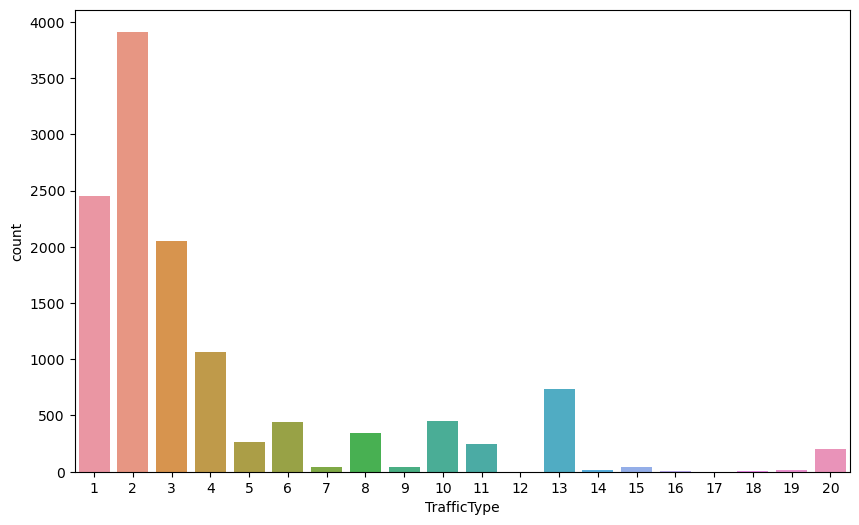

In [7]:
# Plot the countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='TrafficType')

Observation:From the preceding graph, we can see that traffic type 2 has the highest count. 

In [8]:
#getting precised % for each value
print(df['TrafficType'].value_counts(normalize=True))

TrafficType
2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: proportion, dtype: float64


Observation:From the preceding information, we can see that sources 2, 1, 3, and 4 account for 
the majority of our web traffic

<Axes: xlabel='Weekend', ylabel='count'>

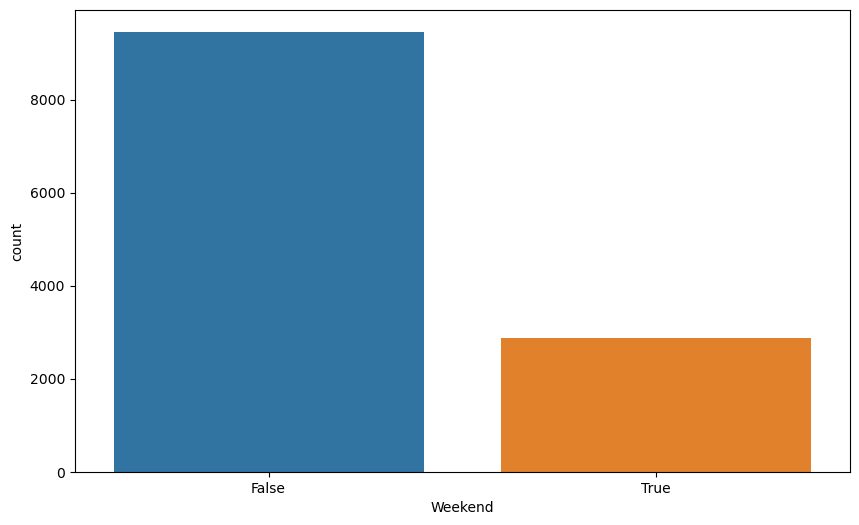

In [9]:
# Plot the countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Weekend')

In [10]:
#narrowing down to count of each sub-category in the weekend Column
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))


Weekend
False    9462
True     2868
Name: count, dtype: int64

Weekend
False    0.767397
True     0.232603
Name: proportion, dtype: float64


Observation:From the count of the False subcategory, we can see that more visitors visit during 
weekdays than weekend days

<Axes: xlabel='Region', ylabel='count'>

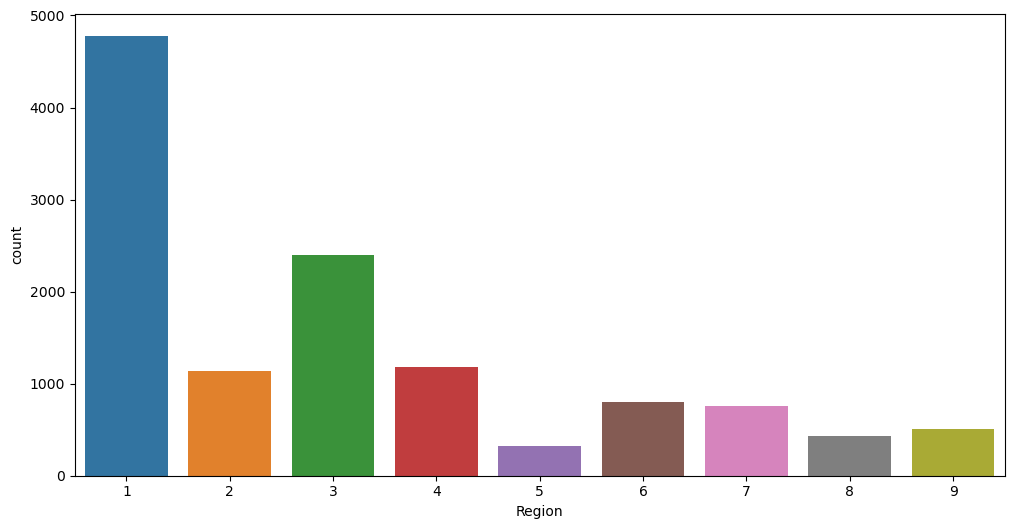

In [11]:
# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Region')

Observation:We can see that Region 1 has the highest 
number of visitors visiting our website.

In [12]:
#narrow it down to count of  each region
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

Region
1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: proportion, dtype: float64


Observation:From the preceding data, we can see that regions 1 and 3 account for 50% of online 
sessions; thus, we can infer that regions 1 and 3 are where most potential consumers 
reside. With this information, we can target our marketing campaigns better

<Axes: xlabel='Browser', ylabel='count'>

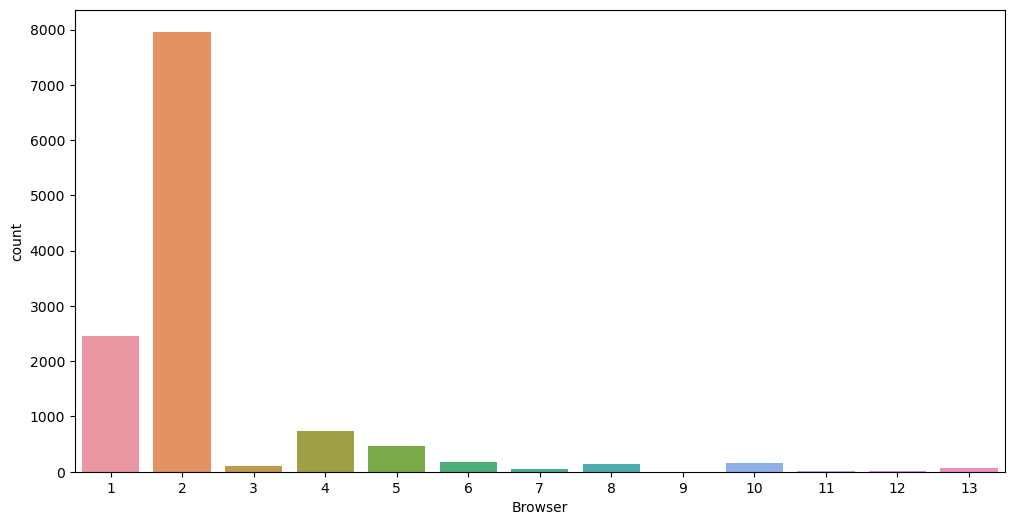

In [13]:
# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Browser')

Observation:From the preceding graph, we can see that browser type 2 contributes the most 
to the website traffic

In [14]:
#determing the count of each sub category
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Browser
2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: proportion, dtype: float64


<Axes: xlabel='OperatingSystems', ylabel='count'>

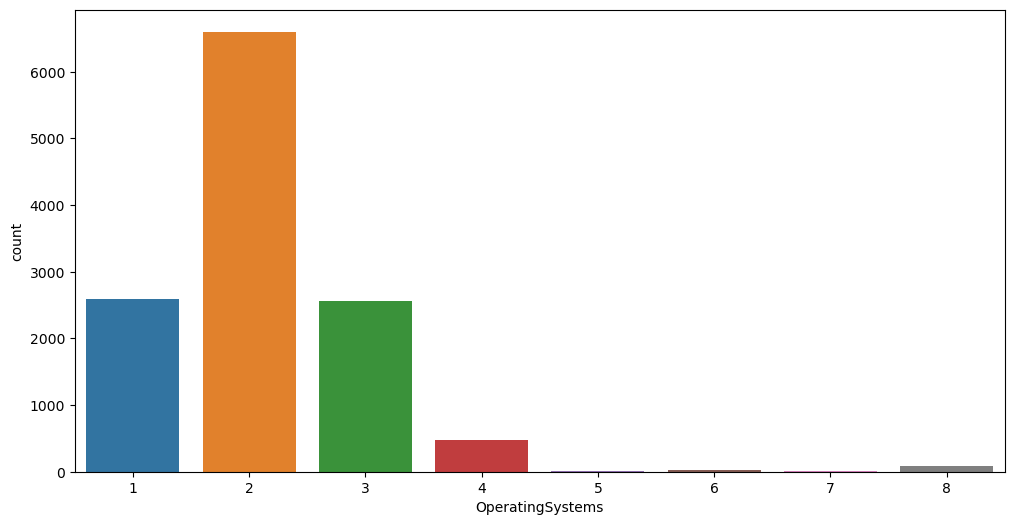

In [15]:
# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='OperatingSystems')

Observation:From the preceding graph, we can see that OS type 2 contributes the most to the 
website traffic

In [16]:
#value counts of each sub category 
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))


OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

OperatingSystems
2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: proportion, dtype: float64


<Axes: xlabel='Administrative', ylabel='count'>

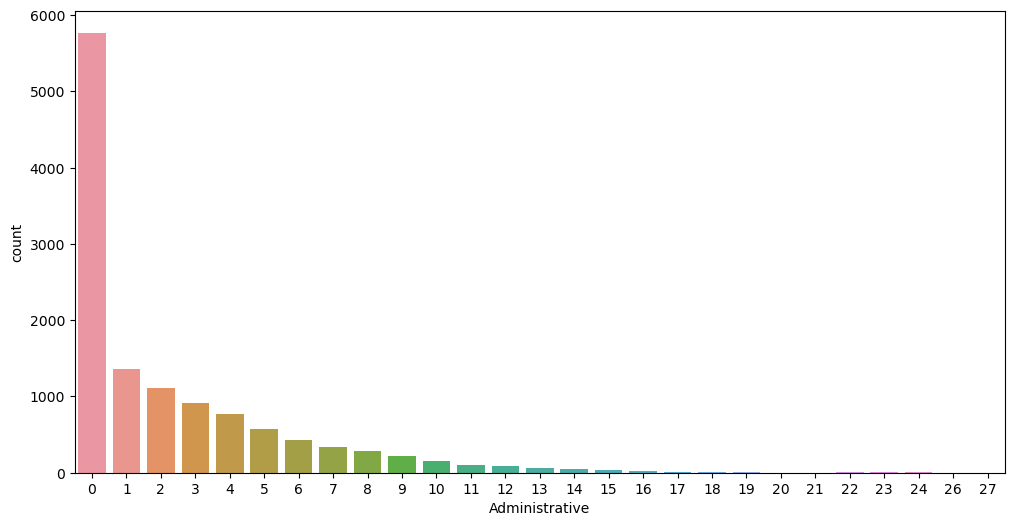

In [17]:
# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Administrative')

We can see from the plot above,that users tend to visit page 0 the most

<Axes: xlabel='Informational', ylabel='count'>

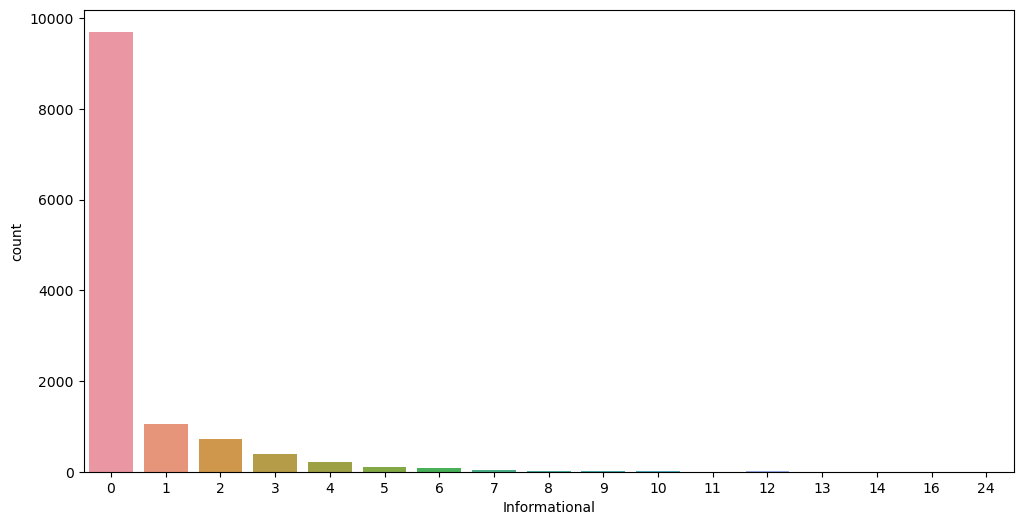

In [18]:
# Plot the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Informational')

we can see that Information page 0 has the highest 
number of visitors

In [19]:
#getting count values for informational page
print(df['Informational'].value_counts(normalize=True))

Informational
0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: proportion, dtype: float64


79% of the users use page 0 and 1

<Axes: xlabel='SpecialDay', ylabel='count'>

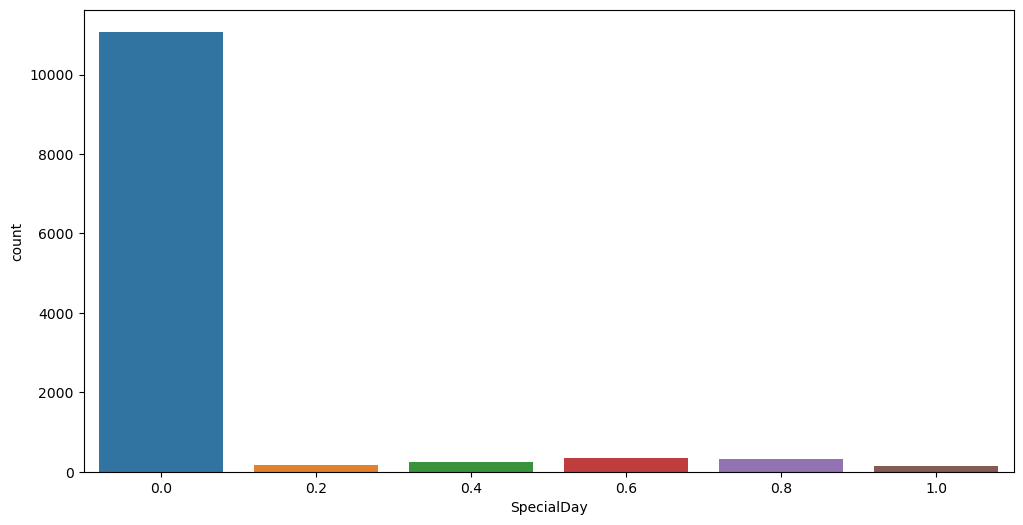

In [20]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='SpecialDay')

we can see that special days have no impact on the number 
of visitors to our website

In [21]:
print(df['SpecialDay'].value_counts(normalize=True))

SpecialDay
0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: proportion, dtype: float64


 89.8% of visitors visited during a 
non-special day (special day subcategory 0), showing that there is no affinity of web 
traffic toward special days

# Bivariate Analysis

We will be performing bivariate analysis between the revenue column and the 
following categories:
    
• Visitor type

• Traffic type

• Region

• Browser type

• Operating system

• Month

• Special day

## Revenue versus visitor type

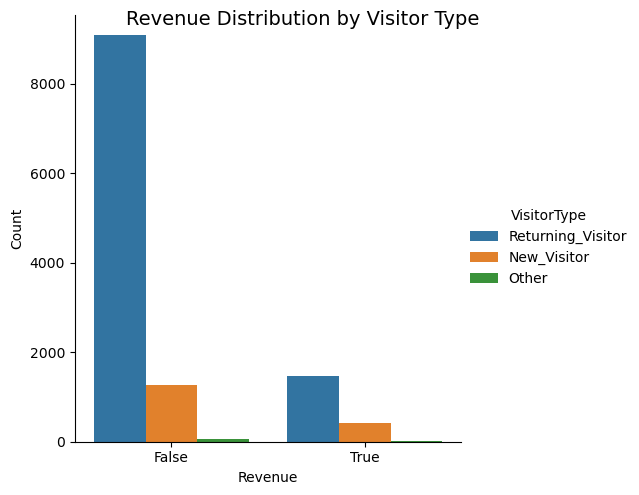

In [22]:
#Revenue versus VisitorType
g = sns.catplot(x="Revenue", hue="VisitorType", data=df, kind="count", height=5, aspect=1)
g.set_axis_labels("Revenue", "Count")
g.fig.suptitle("Revenue Distribution by Visitor Type", fontsize=14)
plt.show()


As you can see, more revenue conversions happen for returning customers than 
new customers. This clearly implies that we need to find ways to incentivize new 
customers to make a transaction with us

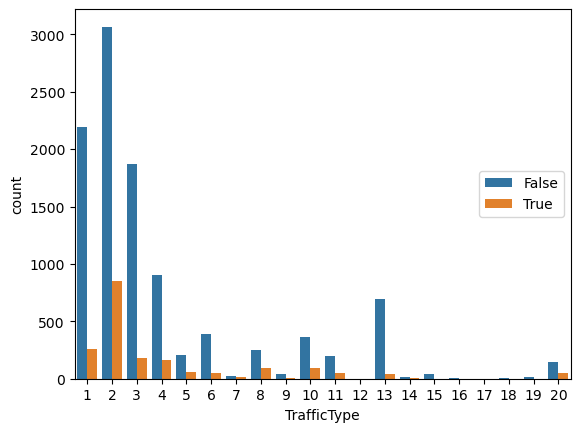

In [23]:
#TrafficType versus Revenue
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()


we can see that more revenue conversion happens for web 
traffic generated from source 2

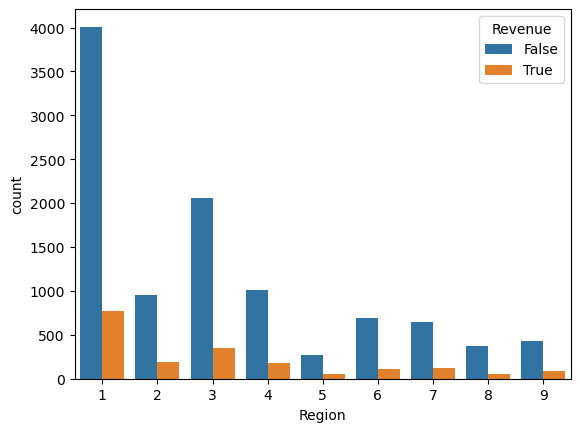

In [24]:
#region versus revenue
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()


Based on the previous graph, it is evident that region 1 has the highest sales, followed by region 3. This insight allows us to enhance our marketing strategies and optimize the supply chain. For instance, we can consider constructing a dedicated warehouse to serve the demands of region 1, thereby improving delivery efficiency and ensuring consistent availability of high-demand products.

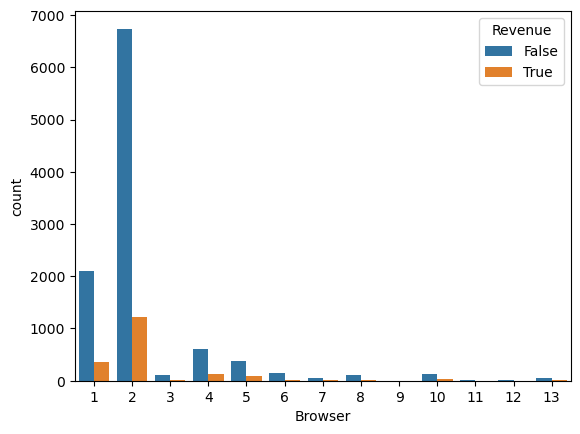

In [25]:
#Browser versus Revenue
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()


As you can see, more revenue-generating transactions have been performed 
from Browser 2. Even though Browser 1 creates a considerable number 
of sessions, the conversion rate is low

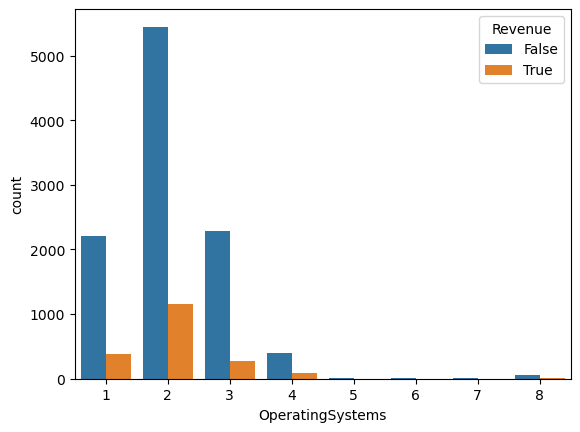

In [26]:
#OperatingSystems versus Revenue
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()


As you can see, more revenue-generating transactions happened with OS 2 than 
the other types.

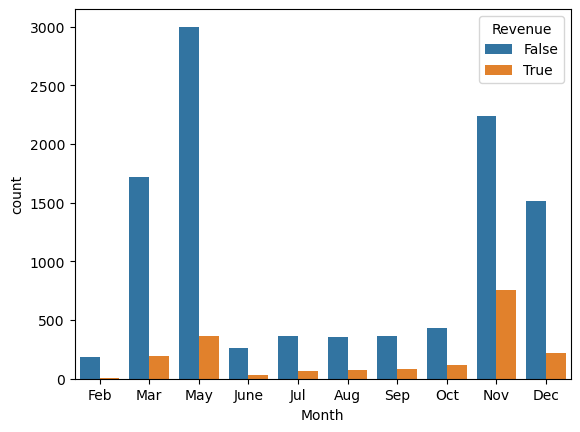

In [27]:
#Month versus Revenue
sns.countplot(x="Month", hue="Revenue",\
              data=df,order=['Feb','Mar','May','June',\
                             'Jul','Aug','Sep','Oct',\
'Nov','Dec'])
plt.show()


Website visitors may be high in May, but we can observe from the preceding bar plot 
that a greater number of purchases were made in the month of November

# Linear Relationships

In this section, we will be studying the linear relationship between the 
following variables:

• Bounce rate versus exit rate

• Page value versus bounce rate

• Page value versus exit rate

• Impact of administration page views and administrative pageview duration 
on revenue

• Impact of information page views and information pageview duration 
on revenue

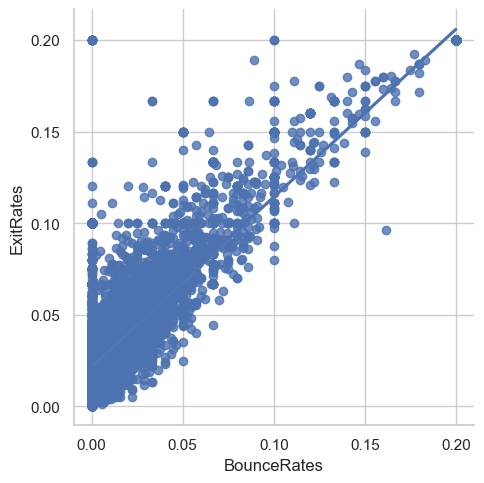

In [54]:
#Bounce Rate versus Exit Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)
plt.savefig('Output/Bounce Rate versus Exit Rate.png',format='png')

As you can see, there is a positive correlation between the bounce rate and the exit 
rate. With the increase in bounce rate, the exit rate of the page increases

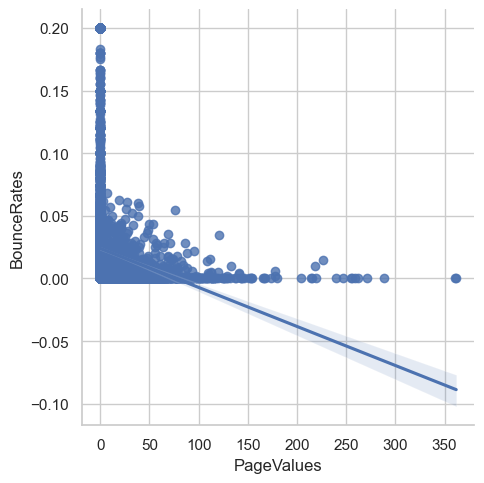

In [55]:
#Page Value versus Bounce Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)
plt.savefig('Output/Page Value versus Bounce Rate.png',format='png')

There is a negative correlation between page 
value and bounce rate. As the page value increases, the bounce rate decreases. 
To increase the probability of a customer purchasing with us, we need to improve the 
page value—perhaps by making the content more engaging or by using images to 
convey the information

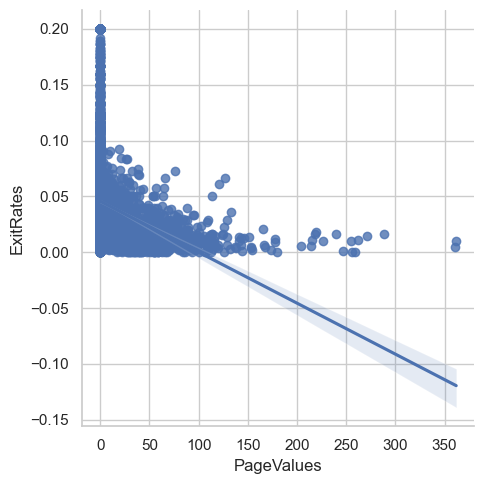

In [56]:
#Page Value versus Exit Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)
plt.savefig('Output/Page Value versus Exit Rate.png',format='png')

As we can see in the preceding plot, there is a negative correlation between page 
value and exit rate. Web pages with a better page value have a lower exit rate

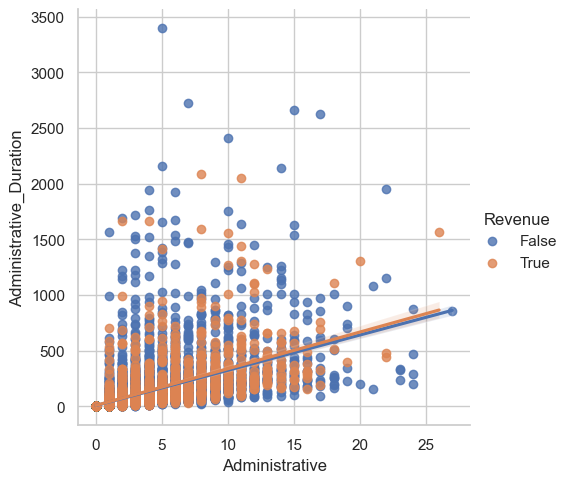

In [57]:
#Impact of Administration Page Views and Administrative Pageview Duration on Revenue
sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\
                hue='Revenue', data=df)
plt.savefig('Output/Impact of Administration Page Views and Administrative Pageview Duration on Revenue.png',format='png')

Based on the data, there is a positive correlation between the number of administrative-related pageviews and the duration of those pageviews. When there is an increase in the number of administrative pageviews, the duration of those pageviews also tends to increase.

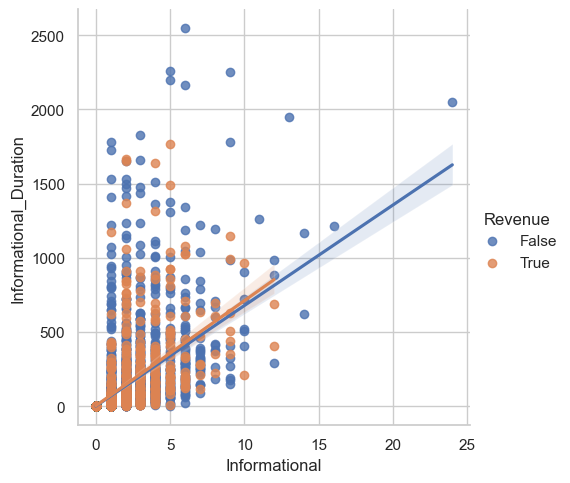

In [58]:
#Impact of Information Page Views and Information Pageview Duration on Revenue 
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df)

There is a positive correlation between the number of information page views and the duration of those page views. When there is an increase in the number of information page views, the duration of those page views also tends to increase. However, customers who have made online purchases tend to visit fewer informational pages. This suggests that informational page views may not have a significant impact on revenue generation.

# Clustering 

In this task, you will conduct clustering analysis using the information pageview duration and bounce rate columns in our dataset. Follow the steps below to complete the task:

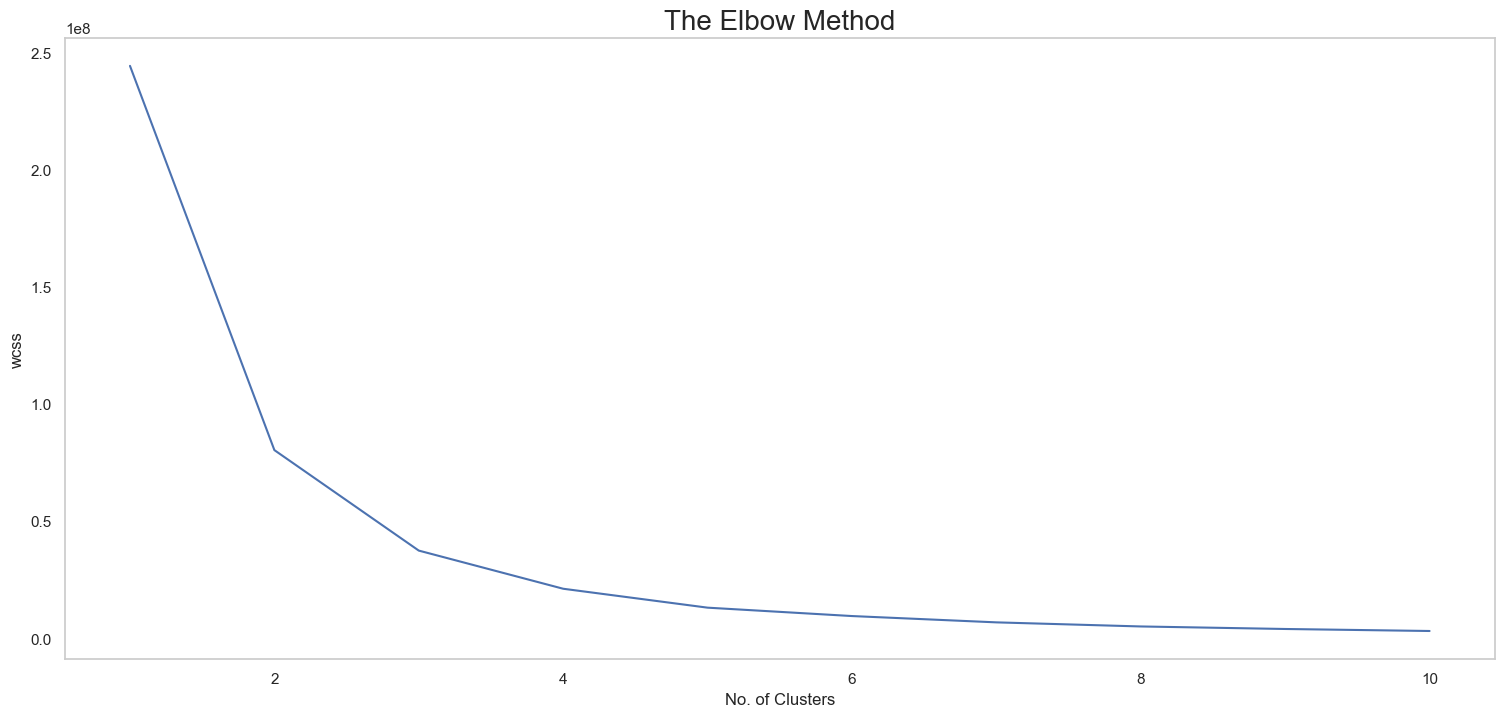

<Figure size 1500x700 with 0 Axes>

In [59]:
x = df.iloc[:, [3, 6]].values
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='elkan', tol=0.001)
    km.fit(x)
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
plt.savefig('Output/Information pageview duration and bounce rate.png',format='png')

From the preceding elbow graph, we can infer that k=2 is the optimum value 
for clustering

In [60]:
#run the k=2
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

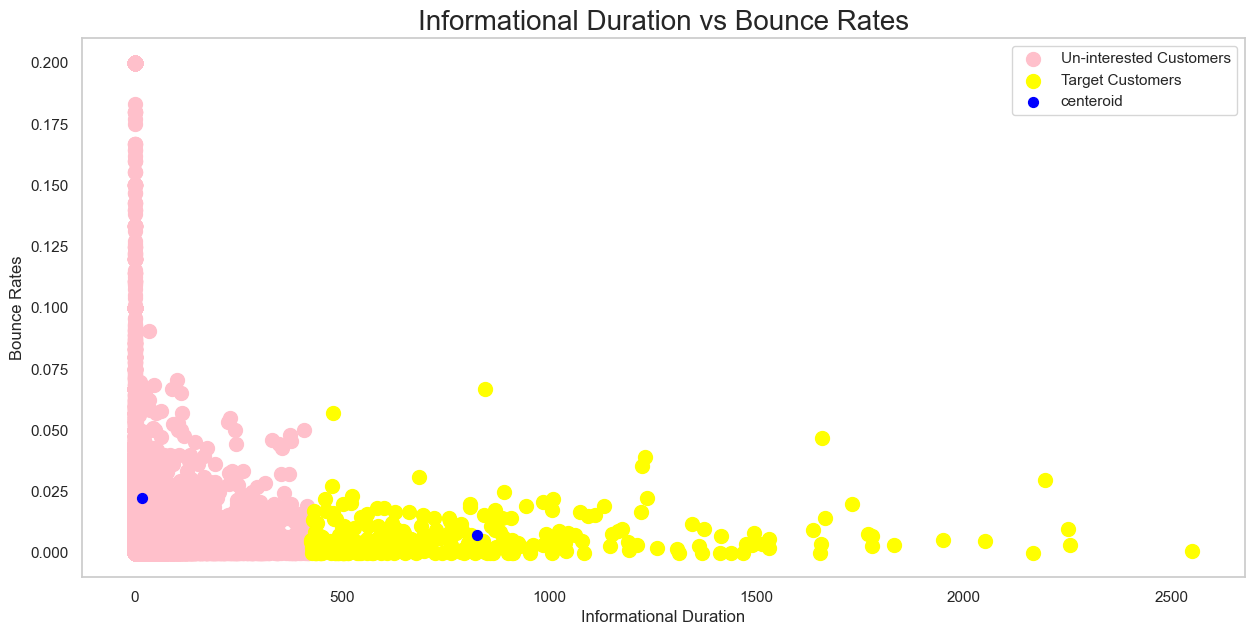

<Figure size 1500x700 with 0 Axes>

In [61]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()
plt.savefig('Output/Information pageview duration vs bounce rate.png',format='png')

From the preceding graph, we can see that our target customers spend around 
850-900 seconds on average on the Information page

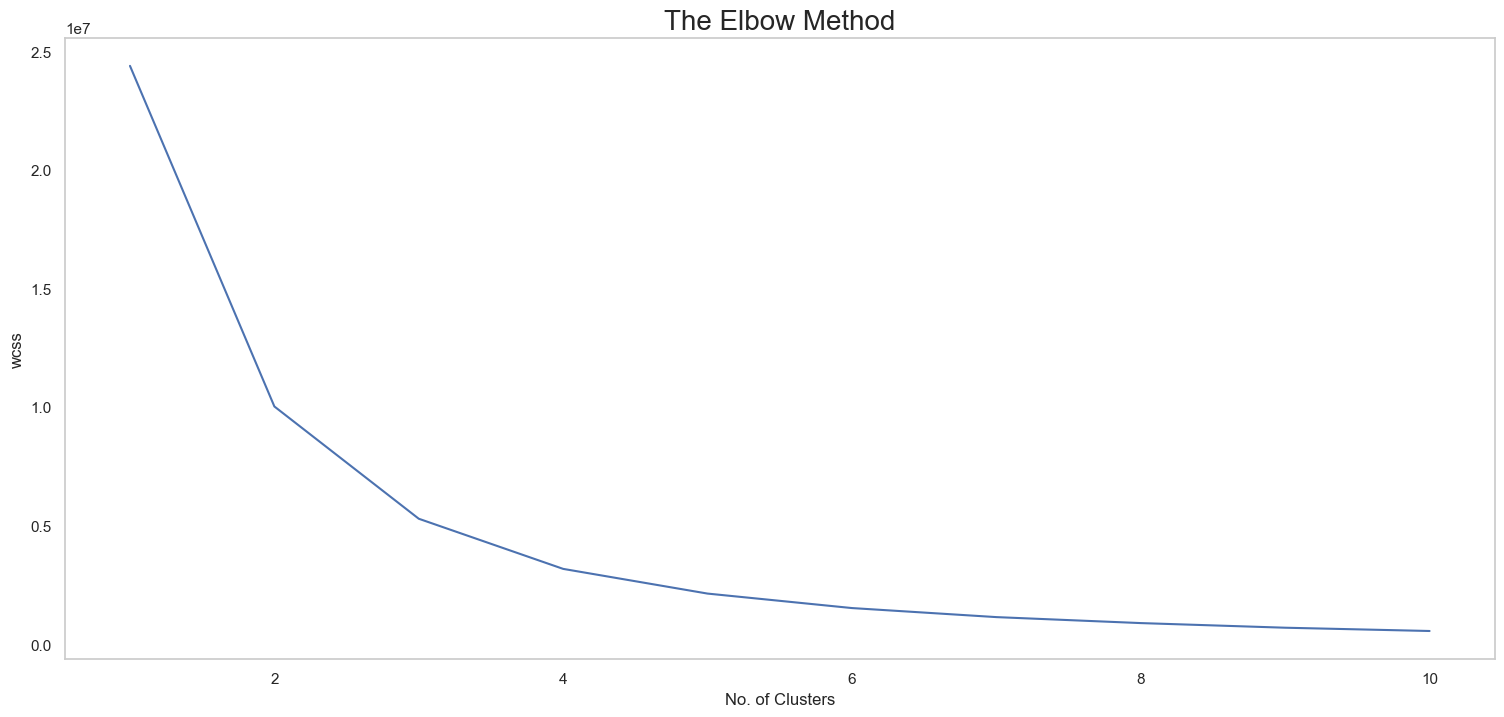

<Figure size 1500x700 with 0 Axes>

In [62]:
#Performing K-means Clustering for Informational Duration versus Exit Rate
x = df.iloc[:, [4, 7]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', \
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)


plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
plt.savefig('Output/Informational Duration versus Exit Rate.png',format='png')

From the preceding elbow graph, we can see that k=2 is the optimum value for 
clustering. 

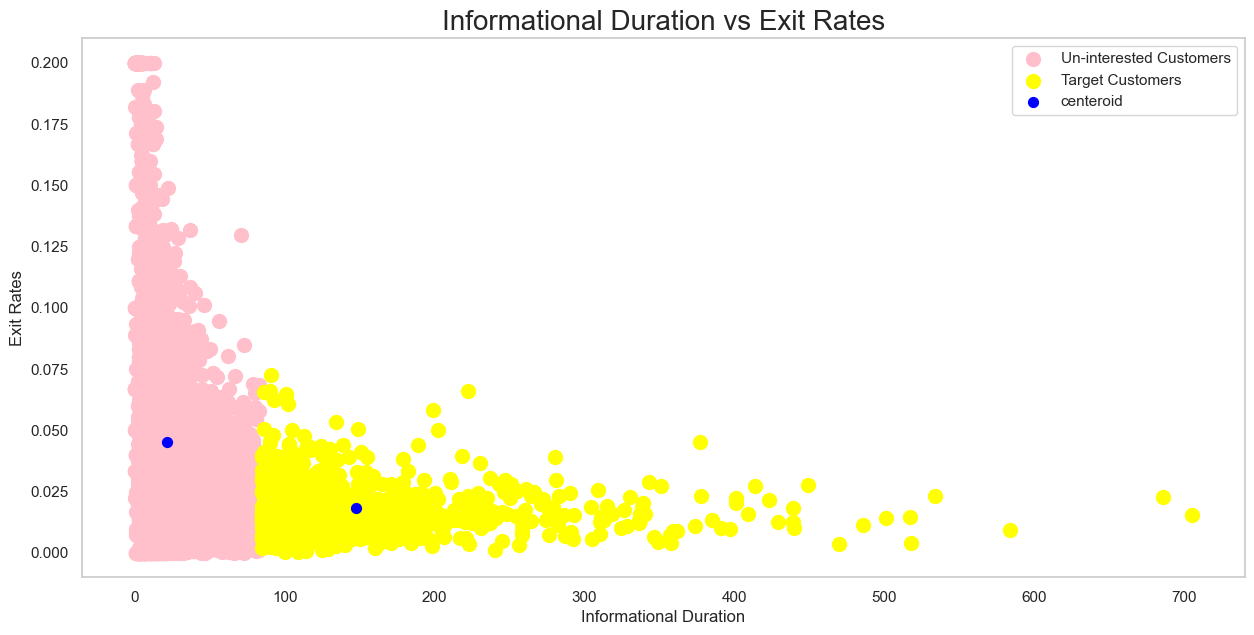

<Figure size 1500x700 with 0 Axes>

In [63]:
#Now, let's run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, \
            n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()
plt.savefig('Output/Informational Duration vs Exit Rate.png',format='png')

we can infer that our target customers spend around 150 
seconds more on average than the other customers before exiting

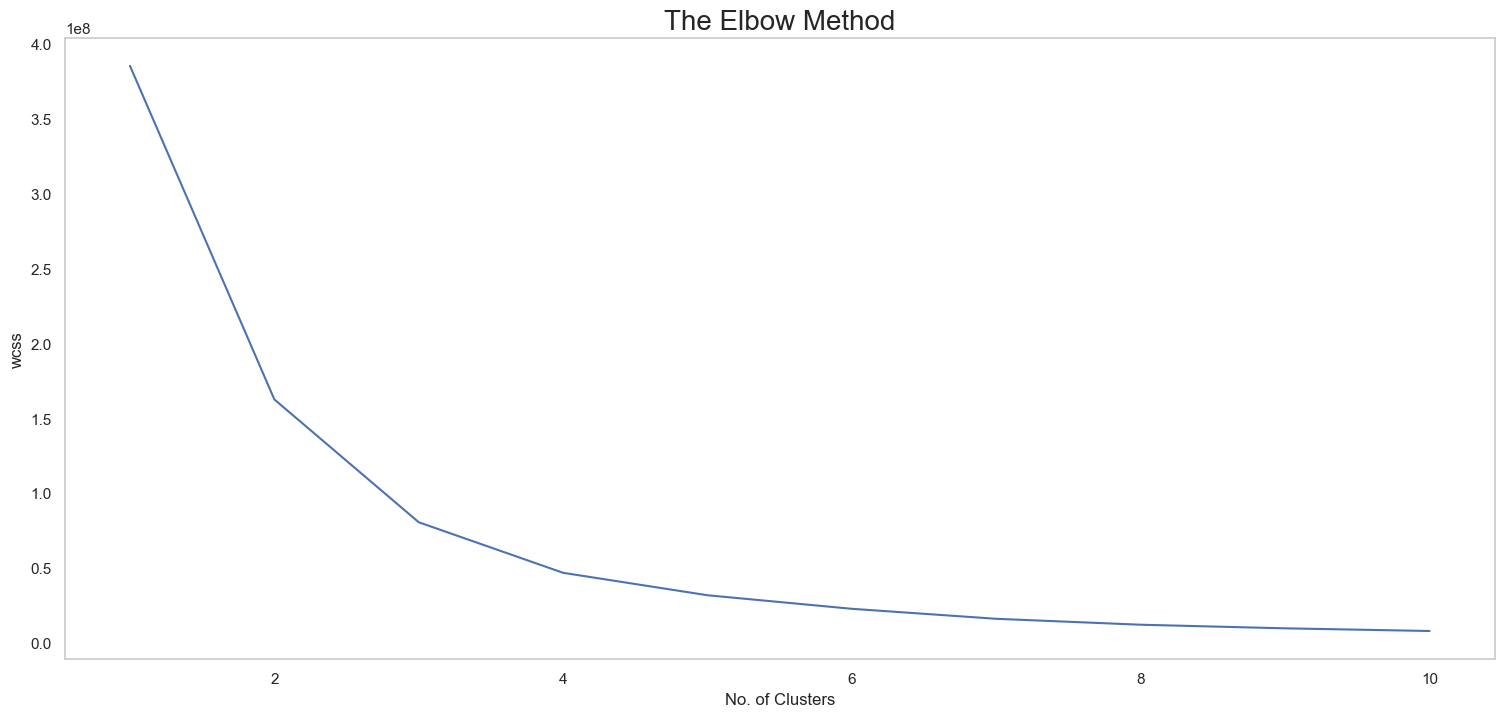

<Figure size 1500x700 with 0 Axes>

In [64]:
#Administrative Pageview Duration and Bounce Rate
x = df.iloc[:, [1, 6]].values
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='elkan', tol=0.001)
    km.fit(x)
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
plt.savefig('Output/Administrative Pageview Duration and Bounce Rate.png',format='png')

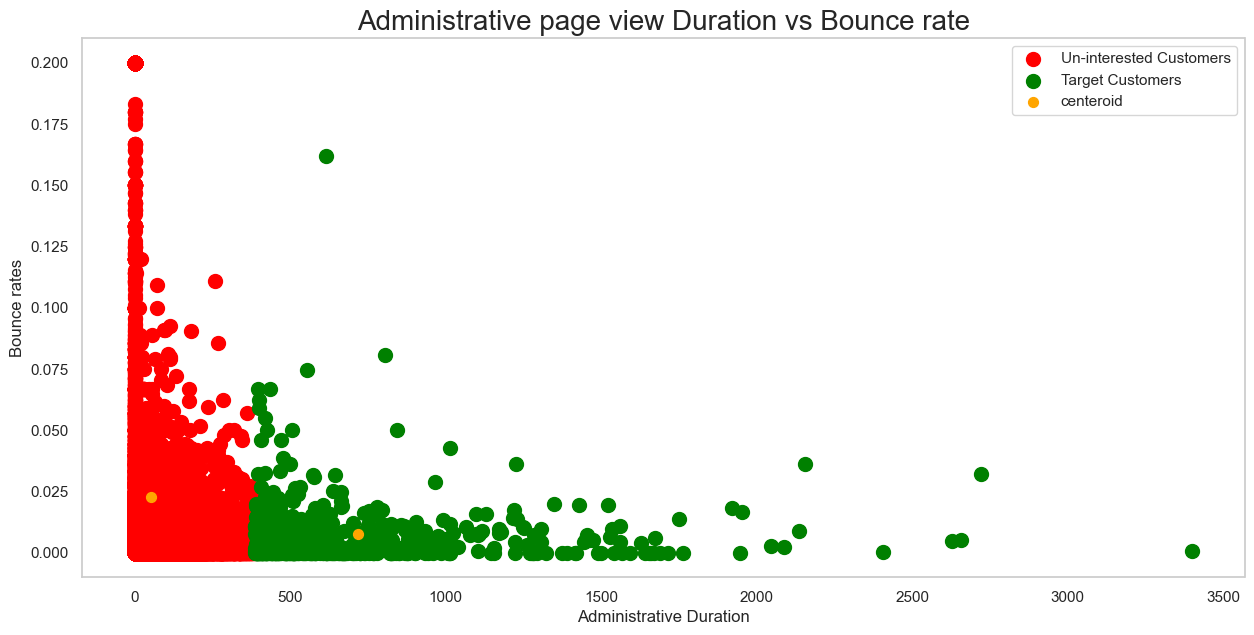

<Figure size 1500x700 with 0 Axes>

In [65]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, \
            n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'orange' , label = 'centeroid')
plt.title('Administrative page view Duration vs Bounce rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce rates')
plt.legend()
plt.show()
plt.savefig('Output/Administrative Pageview Duration vs Bounce Rate.png',format='png')

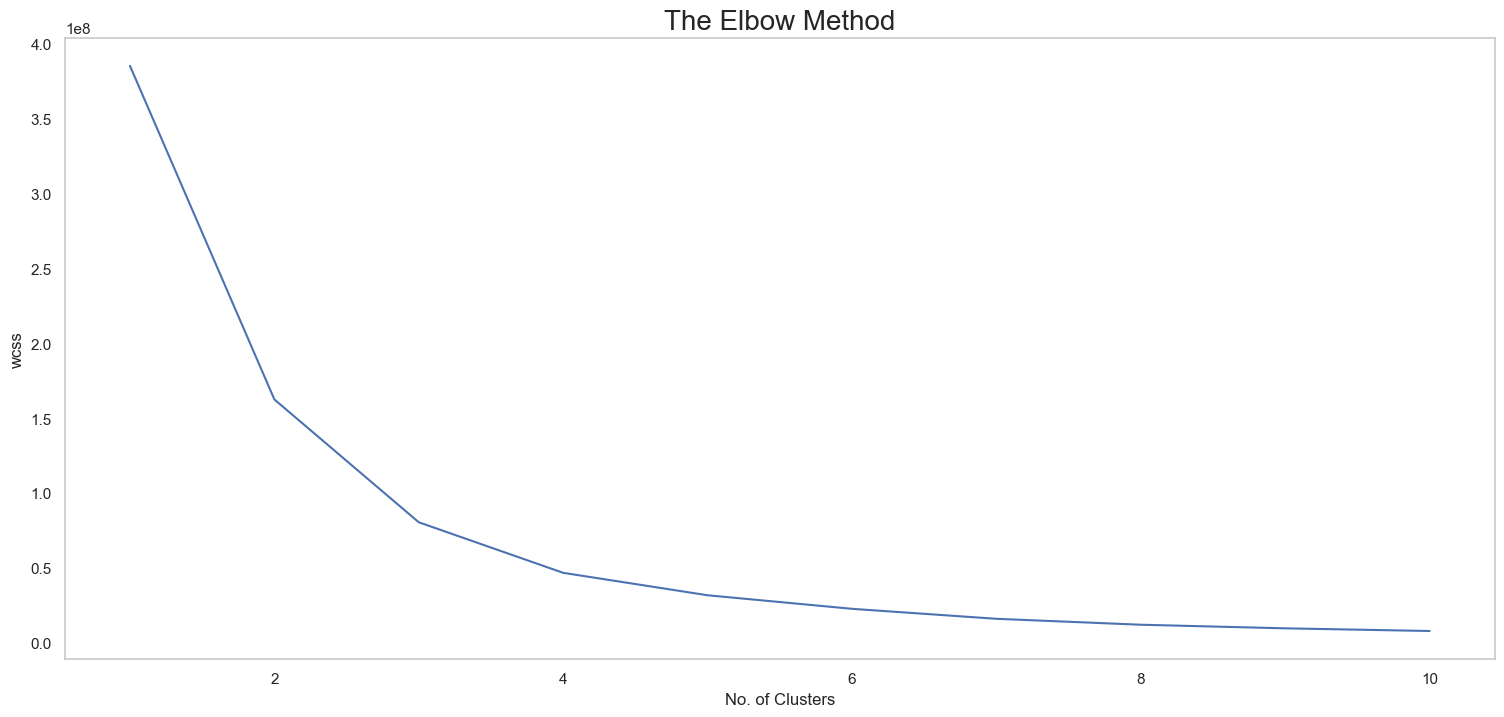

<Figure size 1500x700 with 0 Axes>

In [66]:
#Administrative Pageview Duration and Exit Rate
x = df.iloc[:, [1, 7]].values
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='elkan', tol=0.001)
    km.fit(x)
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
plt.savefig('Output/Administrative Pageview Duration and Exit Rate.png',format='png')

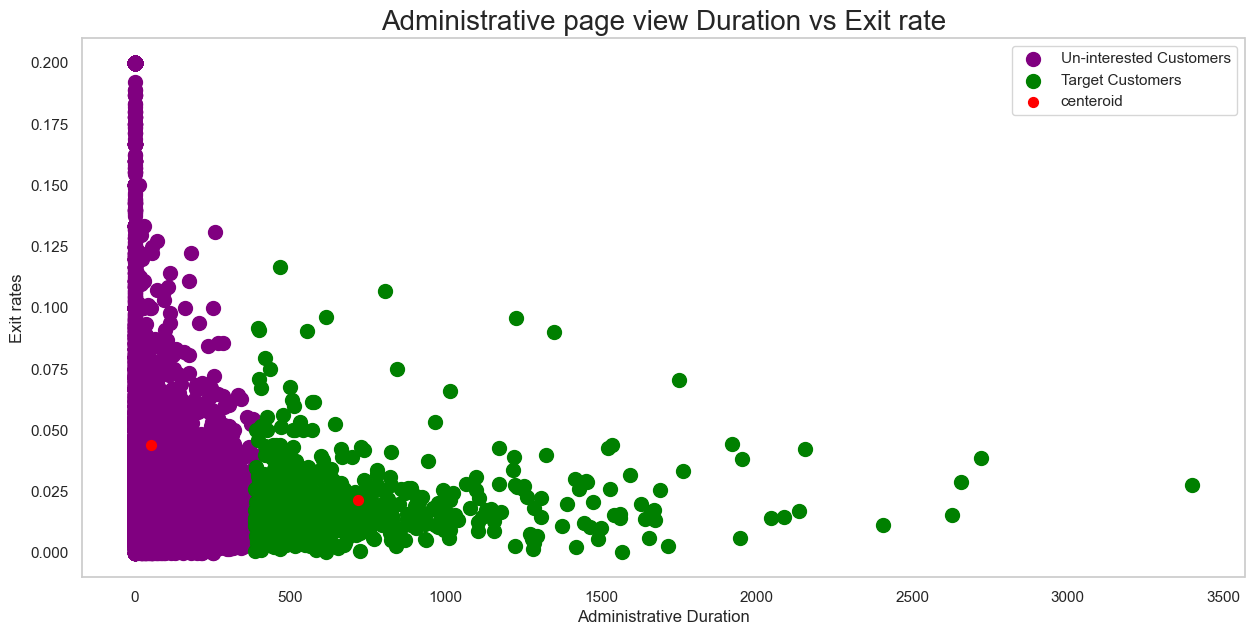

<Figure size 1500x700 with 0 Axes>

In [67]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, \
            n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'purple', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'red' , label = 'centeroid')
plt.title('Administrative page view Duration vs Exit rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit rates')
plt.legend()
plt.show()
plt.savefig('Output/Administrative Pageview Duration vs Exit Rate.png',format='png')

From the preceding graph, we can see that the uninterested customer spends less 
time in administrative pages compared with the target customers, who spend around 
750 seconds on the administrative page before exiting

Based on the analysis conducted in this project, the following conclusions can be drawn:

    New visitors to the website have higher conversion rates compared to returning customers. This suggests that attracting and engaging new customers can be beneficial for improving overall conversion rates.

    Although the number of returning customers is high, their conversion rate is relatively lower compared to new customers. This highlights the need to focus on enhancing the user experience and implementing strategies to encourage repeat purchases from returning customers.

    Pages with a higher page value tend to have lower bounce rates. It is recommended to collaborate with the technical team to explore ways to enhance the page value of web pages, as this can positively impact user engagement and reduce bounce rates.

Taking these findings into consideration, they will play a significant role in shaping future plans and strategies. They provide valuable insights for further research and offer opportunities to develop new business strategies and plans that aim to optimize conversion rates, improve customer retention, and enhance the overall user experience on the website.

# End of project